**Libraries**

In [ ]:
#Importing Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading data**

In [ ]:
#Reading csv FILE
df_train = pd.read_csv('/content/drive/My Drive/Seminar1/Individual/Train.csv')
df_test = pd.read_csv('/content/drive/My Drive/Seminar1/Individual/Test.csv')

In [ ]:
#CHECKING DATA IN TABULATED FORM
df_train.head()

,Unnamed: 0,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,504,15715527,543,Spain,Female,41,4,NaN,1,0,0,194902.16,0
1,1286,15590993,579,Spain,Male,37,5,152212.88,2,0,0,120219.14,0
2,6293,15783083,534,France,Male,27,9,NaN,2,1,0,161344.13,0
3,8679,15753092,791,Germany,Male,35,5,129828.58,1,1,1,181918.26,1
4,8122,15603749,564,France,Female,53,2,45472.28,1,1,1,41055.71,1


In [ ]:
len(df_train)
df_train.shape

(8000, 13)

In [ ]:
df_train.isnull().any()

Unnamed: 0          False
customer_id         False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance              True
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [ ]:
#Checking dataframe variables and types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8000 non-null   int64  
 1   customer_id       8000 non-null   int64  
 2   credit_score      8000 non-null   int64  
 3   country           8000 non-null   object 
 4   gender            8000 non-null   object 
 5   age               8000 non-null   int64  
 6   tenure            8000 non-null   int64  
 7   balance           5120 non-null   float64
 8   products_number   8000 non-null   int64  
 9   credit_card       8000 non-null   int64  
 10  active_member     8000 non-null   int64  
 11  estimated_salary  8000 non-null   float64
 12  churn             8000 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 812.6+ KB


In [ ]:
df_train.describe() 

,Unnamed: 0,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,5120.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5012.214000,1.569151e+07,649.867250,38.940125,4.985875,119628.220590,1.528125,0.707875,0.518375,100170.706255,0.206500
std,2878.439475,7.180078e+04,96.749996,10.519179,2.892874,29924.343954,0.581594,0.454768,0.499693,57649.511665,0.404819
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2520.750000,1.562960e+07,583.000000,32.000000,2.000000,99815.565000,1.000000,0.000000,0.000000,50768.320000,0.000000
50%,5000.500000,1.569179e+07,651.000000,37.000000,5.000000,119621.480000,1.000000,1.000000,1.000000,100523.305000,0.000000
75%,7503.250000,1.575453e+07,717.000000,44.000000,7.000000,139191.380000,2.000000,1.000000,1.000000,149481.902500,0.000000
max,9999.000000,1.581566e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
df_train.isnull().sum()

Unnamed: 0             0
customer_id            0
credit_score           0
country                0
gender                 0
age                    0
tenure                 0
balance             2880
products_number        0
credit_card            0
active_member          0
estimated_salary       0
churn                  0
dtype: int64

In [ ]:
df_train[["balance"]].dtypes

balance    float64
dtype: object

In [ ]:
#Imputation
mean_value=df_train['balance'].mean()
df_train['balance']=df_train['balance']\
                        .fillna(mean_value)

In [ ]:
df_train.drop(labels=['customer_id'], axis=1,inplace = True)
column_churn = df_train['churn']
df_train.drop(labels=['churn'], axis=1,inplace = True)
df_train.insert(len(df_train.columns), 'churn', column_churn.values)

KeyError: ignored

In [ ]:
df_train.head()

,Unnamed: 0,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,504,543,Spain,Female,41,4,119628.22059,1,0,0,194902.16,0
1,1286,579,Spain,Male,37,5,152212.88000,2,0,0,120219.14,0
2,6293,534,France,Male,27,9,119628.22059,2,1,0,161344.13,0
3,8679,791,Germany,Male,35,5,129828.58000,1,1,1,181918.26,1
4,8122,564,France,Female,53,2,45472.28000,1,1,1,41055.71,1


In [ ]:
df_train["country"] = df_train["country"].astype('category')
df_train["gender"] = df_train["gender"].astype('category')
df_train["credit_card"] = df_train["credit_card"].astype('category')
df_train["churn"] = df_train["churn"].astype('category')
df_train["active_member"] = df_train["active_member"].astype('category')

,Unnamed: 0,credit_score,country,gender,age,tenure,balance,products_number,credit_card,estimated_salary,churn
Unnamed: 0,1.000000,0.002410,-0.015313,0.013312,0.000079,0.000913,-0.007944,0.007609,-0.003867,0.003864,-0.019285
credit_score,0.002410,1.000000,0.008447,-0.007623,-0.000726,-0.008651,-0.007930,0.025803,-0.007093,0.002732,-0.024452
country,-0.015313,0.008447,1.000000,0.000255,0.019564,-0.006870,-0.014608,0.009044,-0.012988,-0.000512,0.035133
gender,0.013312,-0.007623,0.000255,1.000000,-0.024052,0.015026,0.016824,-0.028451,0.004223,-0.012872,-0.104982
age,0.000079,-0.000726,0.019564,-0.024052,1.000000,-0.003631,-0.015232,-0.030816,-0.014659,-0.006441,0.284591
tenure,0.000913,-0.008651,-0.006870,0.015026,-0.003631,1.000000,0.000805,0.016026,0.030313,0.007214,-0.011920
balance,-0.007944,-0.007930,-0.014608,0.016824,-0.015232,0.000805,1.000000,-0.002379,0.000373,-0.004562,0.014458
products_number,0.007609,0.025803,0.009044,-0.028451,-0.030816,0.016026,-0.002379,1.000000,0.001998,0.019462,-0.049627
credit_card,-0.003867,-0.007093,-0.012988,0.004223,-0.014659,0.030313,0.000373,0.001998,1.000000,-0.004538,-0.013859
estimated_salary,0.003864,0.002732,-0.000512,-0.012872,-0.006441,0.007214,-0.004562,0.019462,-0.004538,1.000000,0.016439


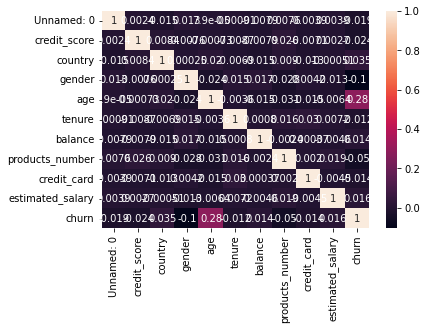

In [ ]:
corr = df_train.corr()
sns.heatmap(corr, \
            xticklabels=corr.columns.values,\
 yticklabels=corr.columns.values,annot=True)
corr

In [ ]:
df_train['churn'].value_counts(0)

0    6348
1    1652
Name: churn, dtype: int64

In [ ]:
df_train['churn'].value_counts(1)*100

NameError: ignored

In [ ]:
df_train['credit_card'].value_counts(1)*100

1    70.7875
0    29.2125
Name: credit_card, dtype: float64

In [ ]:
summary_churn = df_train.groupby('churn')
summary_churn.mean()

,Unnamed: 0,credit_score,age,tenure,balance,products_number,estimated_salary
churn,,,,,,,
0,5040.530403,651.074039,37.413043,5.003466,119451.666427,1.542848,99687.286752
1,4903.404964,645.230024,44.808111,4.918281,120306.650267,1.471550,102028.301295


In [ ]:
summary_churn.median()

,Unnamed: 0,credit_score,age,tenure,balance,products_number,estimated_salary
churn,,,,,,,
0,5045.5,652.0,36.0,5.0,119628.22059,2.0,99809.59
1,4850.0,646.0,45.0,5.0,119628.22059,1.0,103545.68


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'No of Customers')

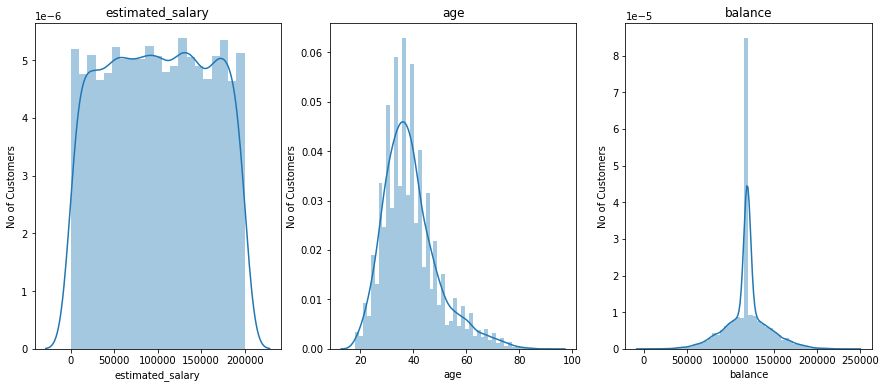

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6)) 

sns.distplot(df_train.estimated_salary, kde=True, \
             ax=axes[0]).set_title('estimated_salary') 
axes[0].set_ylabel('No of Customers') 

sns.distplot(df_train.age, kde=True, \
             ax=axes[1]).set_title('age') 
axes[1].set_ylabel('No of Customers') 

sns.distplot(df_train.balance, kde=True, \
             ax=axes[2]).set_title('balance') 
axes[2].set_ylabel('No of Customers')

Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

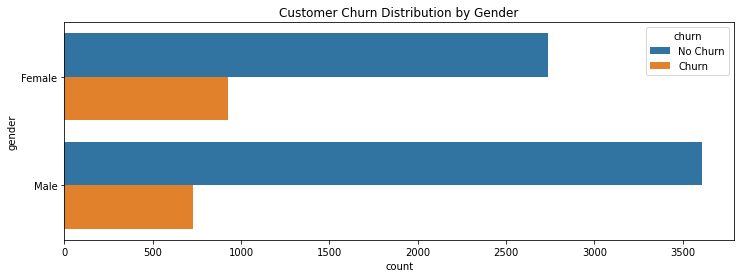

In [ ]:
plt.figure(figsize=(12,4)) 
p=sns.countplot(y="gender", hue='churn', data=df_train) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Churn Distribution by Gender')

Text(0.5, 1.0, 'Customer Geography Distribution')

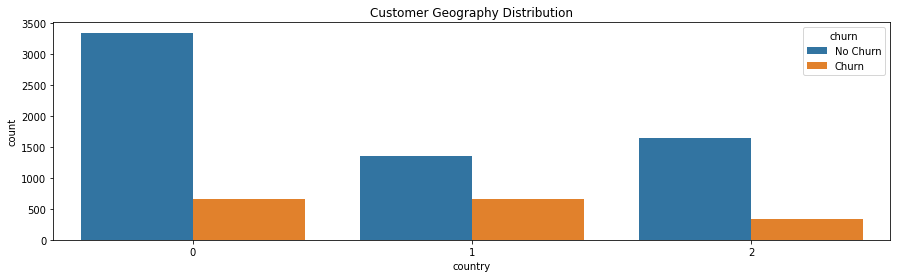

In [ ]:
plt.figure(figsize=(15, 4)) 
p=sns.countplot(x='country', hue='churn', data=df_train) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Geography Distribution')

Text(0.5, 1.0, 'Customer Distribution by Product')

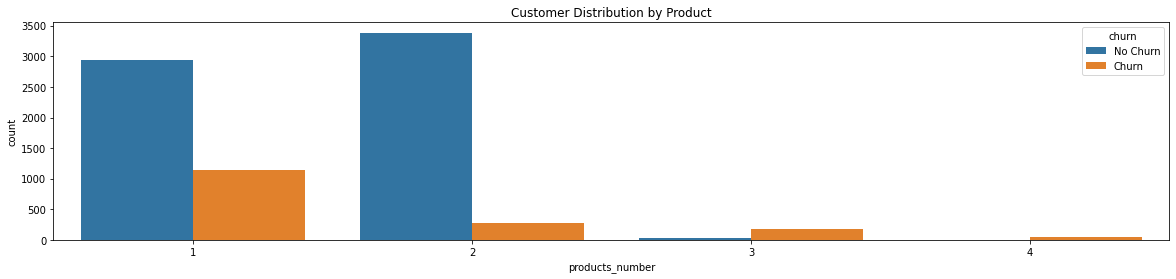

In [ ]:
plt.figure(figsize=(20,4)) 
p=sns.countplot(x='products_number', hue='churn', data=df_train) 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Distribution by Product')

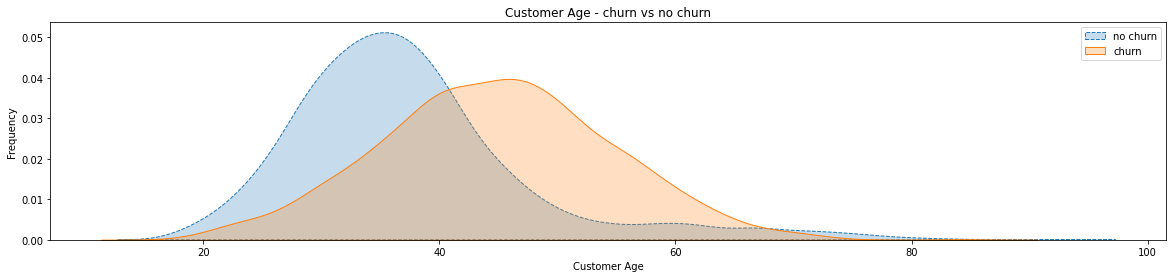

In [ ]:
plt.figure(figsize=(20,4)) 
ax=sns.kdeplot(df_train.loc[(df_train['churn'] == 0),'age'] , \
 color=sns.color_palette()[0],\
 shade=True,label='no churn', \
 linestyle='--') 
ax=sns.kdeplot(df_train.loc[(df_train['churn'] == 1),'age'] , \
 color=sns.color_palette()[1],\
 shade=True, label='churn') 
ax.set(xlabel='Customer Age', ylabel='Frequency') 
plt.title('Customer Age - churn vs no churn')
plt.legend()

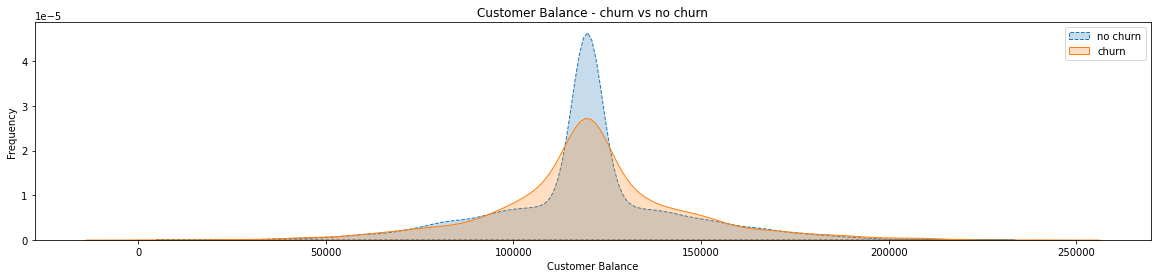

In [ ]:
plt.figure(figsize=(20,4))
ax=sns.kdeplot(df_train.loc[(df_train['churn'] == 0),'balance'] , \
       color=sns.color_palette()[0],\
      shade=True,label='no churn',linestyle='--') 
ax=sns.kdeplot(df_train.loc[(df_train['churn'] == 1),'balance'] , \
      color=sns.color_palette()[1],\
      shade=True, label='churn') 
ax.set(xlabel='Customer Balance', ylabel='Frequency') 
plt.title('Customer Balance - churn vs no churn')
plt.legend()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
df_train.dtypes

Unnamed: 0             int64
credit_score           int64
country                 int8
gender                  int8
age                    int64
tenure                 int64
balance              float64
products_number        int64
credit_card             int8
active_member       category
estimated_salary     float64
churn                   int8
dtype: object

In [ ]:
### Encoding the categorical variables
df_train["country"] = df_train["country"].astype('category')\
        .cat.codes
df_train["gender"] = df_train["gender"].astype('category').cat.codes
df_train["credit_card"] = df_train["credit_card"].astype('category')\
        .cat.codes
df_train["churn"] = df_train["churn"].astype('category').cat.codes

In [ ]:
#Setting up X & Y
Target = 'churn'
X = df_train.drop('churn', axis=1)
y=df_train[Target]






Splitting **Data**

In [ ]:
#Training & Testing of train dataset (!)
X_train, X_test, y_train, y_test = train_test_split\
                    (X,y,test_size=0.20, \
                     random_state=123, \
                     stratify=y) 

In [ ]:
forest=RandomForestClassifier(n_estimators=500,random_state=1)

forest.fit(X_train,y_train)

importances=forest.feature_importances_
features = df_train.drop(['churn'],axis=1).columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,4)) 
plt.title("Feature importances using Random Forest") 
plt.bar(range(X_train.shape[1]), importances[indices],\
        align="center") 
plt.xticks(range(X_train.shape[1]), features[indices], \
           rotation='vertical',fontsize=15) 
plt.xlim([-1, X_train.shape[1]])
plt.show() 

NameError: ignored

In [ ]:
feature_importance_df = pd.DataFrame({"Feature":features,\
                                      "Importance":importances}) 
print(feature_importance_df)

             Feature  Importance
0         Unnamed: 0    0.117213
1       credit_score    0.116132
2            country    0.034857
3             gender    0.016466
4                age    0.225694
5             tenure    0.065531
6            balance    0.124057
7    products_number    0.124708
8        credit_card    0.017311
9      active_member    0.038332
10  estimated_salary    0.119700


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
#Logistic Regression
import statsmodels.api as sm 

top6_features = ['age','estimated_salary','credit_score',\
                 'balance','products_number', 'tenure']  
#logistic_regression = LogisticRegression()
#logistic_regression.fit(X_train[top6_features], y_train)
logReg = sm.Logit(y_train, X_train[top6_features]) 
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.478435
         Iterations 6


In [ ]:
logistic_regression.summary
logistic_regression.params

age                 5.162930e-02
estimated_salary   -1.502484e-07
credit_score       -3.220400e-03
balance            -5.953441e-06
products_number    -3.141371e-01
tenure             -2.876701e-02
dtype: float64

In [ ]:
result=logistic_regression
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 6400
Model:                          Logit   Df Residuals:                     6394
Method:                           MLE   Df Model:                            5
Date:                Sat, 10 Dec 2022   Pseudo R-squ.:                 0.06073
Time:                        10:23:19   Log-Likelihood:                -3062.0
converged:                       True   LL-Null:                       -3259.9
Covariance Type:            nonrobust   LLR p-value:                 2.237e-83
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.0516      0.003     19.042      0.000       0.046       0.057
estimated_salary -1.502e-07   5.45e-07     -0.276      0.783   -1.22e-06    9.18e-07
credit_score        -0.0032 

Significant variables: age, credit_score, balance, product_number, tenure

In [ ]:
#Calculating the Log_Odds Ratio
model_odds = pd.DataFrame(np.exp(logistic_regression.params), columns= ['Log_Odd'])
model_odds['z-value']= logistic_regression.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(logistic_regression.conf_int())

model_odds

,Log_Odd,z-value,2.5%,97.5%
age,1.052985,7.586044e-81,1.047405,1.058596
estimated_salary,1.000000,7.828824e-01,0.999999,1.000001
credit_score,0.996785,1.200503e-39,0.996307,0.997262
balance,0.999994,1.080046e-07,0.999992,0.999996
products_number,0.730419,6.280627e-09,0.656964,0.812086
tenure,0.971643,7.988629e-03,0.951208,0.992517


**Prediction on the test part of *Train datase*t (!)** - Logistic Regression

In [ ]:
X_test= X_test[top6_features]

In [ ]:
y_pred_logreg = logistic_regression.predict(X_test)
y_pred_logreg
#Probabilities


2731    0.376353
7177    0.096320
7106    0.083330
4590    0.323176
4681    0.066547
          ...   
6144    0.283236
567     0.146275
5103    0.170089
7428    0.157710
5485    0.336958
Length: 1600, dtype: float64

In [ ]:
y_pred_logreg = (y_pred_logreg >= 0.5).astype(int)
y_pred_logreg

2731    0
7177    0
7106    0
4590    0
4681    0
       ..
6144    0
567     0
5103    0
7428    0
5485    0
Length: 1600, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, y_pred_logreg)
score1

0.779375

In [ ]:
print("Logistic Regression accuracy is :", score1)

Logistic Regression accuracy is : 0.779375


Accuracy of logistic regression classifier on test set of **TRAIN** dataset: **0.78**




**Random Forest Model**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf_model.fit(X_train[top6_features], y_train)



RandomForestClassifier(max_leaf_nodes=30, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=50)

**Prediction on the test part of *Train datase*t (!)** - Random Forest Model

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([1, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
y_pred_rf = (y_pred_rf >= 0.5).astype(int)
y_pred_rf

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
score2 = accuracy_score(y_test, y_pred_rf)
score2

0.845625

In [ ]:
print("Random Forest model accuracy is :", score2)

Random Forest model accuracy is : 0.845625


Accuracy of Random Forest classifier on test set of **TRAIN** dataset: **0.85**

Accuracy of Random Forest Model is higher than Logistic Regression (0.85>0.78), so I will build a prediction based on **Random Forest Model** on the **Test dataset**

***Test* dataset preparation**

In [ ]:
len(df_test)
df_test.shape

(2000, 12)

In [ ]:
df_test.head()

,Unnamed: 0,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,0,15634602,619,France,Female,42,2,NaN,1,1,1,101348.88
1,2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57
2,5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
3,7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
4,11,15737173,497,Spain,Male,24,3,NaN,2,1,0,76390.01


In [ ]:
df_test.isnull().sum()

Unnamed: 0            0
customer_id           0
credit_score          0
country               0
gender                0
age                   0
tenure                0
balance             737
products_number       0
credit_card           0
active_member         0
estimated_salary      0
dtype: int64

In [ ]:
#Imputation
mean_value=df_test['balance'].mean()
df_test['balance']=df_test['balance']\
                        .fillna(mean_value)

**Prediction on the test part of *Test datase*t (!)** - using Random Forest Model

In [ ]:
y_pred_new_rf = rf_model.predict(df_test[top6_features])

In [ ]:
y_pred_new_rf

array([0, 1, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
answer = pd.DataFrame({'customer_id': df_test['customer_id'], 'churn': y_pred_new_rf})


In [ ]:
answer

,customer_id,churn
0,15634602,0
1,15619304,1
2,15574012,0
3,15656148,1
4,15737173,0
...,...,...
1995,15719276,0
1996,15768163,0
1997,15656710,0
1998,15588839,0


**Unloading predicted churn**

In [ ]:
answer.to_csv (r'/content/drive/My Drive/Seminar1/Individual/Individual_Task.csv', index= False )

In [ ]:
answer.to_excel (r'/content/drive/My Drive/Seminar1/Individual/Individual_Task.xlsx', index= False)